In [58]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

# Load dataset
data = pd.read_csv('fetal_health.csv')
data.head()





,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [59]:
data.shape

(2126, 22)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [61]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [62]:
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

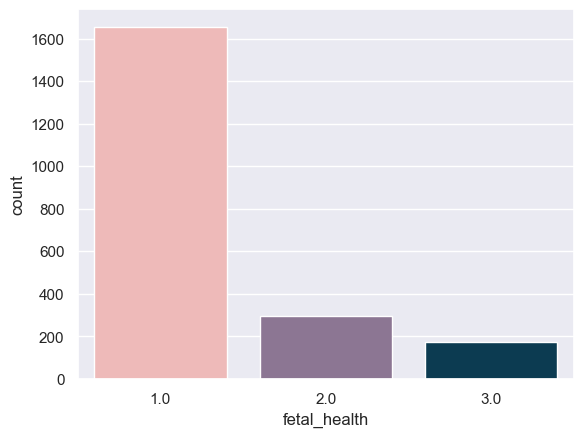

In [63]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health", palette=colours)

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


array([[<Axes: title={'center': 'baseline value'}>,
        <Axes: title={'center': 'accelerations'}>,
        <Axes: title={'center': 'fetal_movement'}>,
        <Axes: title={'center': 'uterine_contractions'}>,
        <Axes: title={'center': 'light_decelerations'}>],
       [<Axes: title={'center': 'severe_decelerations'}>,
        <Axes: title={'center': 'prolongued_decelerations'}>,
        <Axes: title={'center': 'abnormal_short_term_variability'}>,
        <Axes: title={'center': 'mean_value_of_short_term_variability'}>,
        <Axes: title={'center': 'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<Axes: title={'center': 'mean_value_of_long_term_variability'}>,
        <Axes: title={'center': 'histogram_width'}>,
        <Axes: title={'center': 'histogram_min'}>,
        <Axes: title={'center': 'histogram_max'}>,
        <Axes: title={'center': 'histogram_number_of_peaks'}>],
       [<Axes: title={'center': 'histogram_number_of_zeroes'}>,
        <Axes: ti

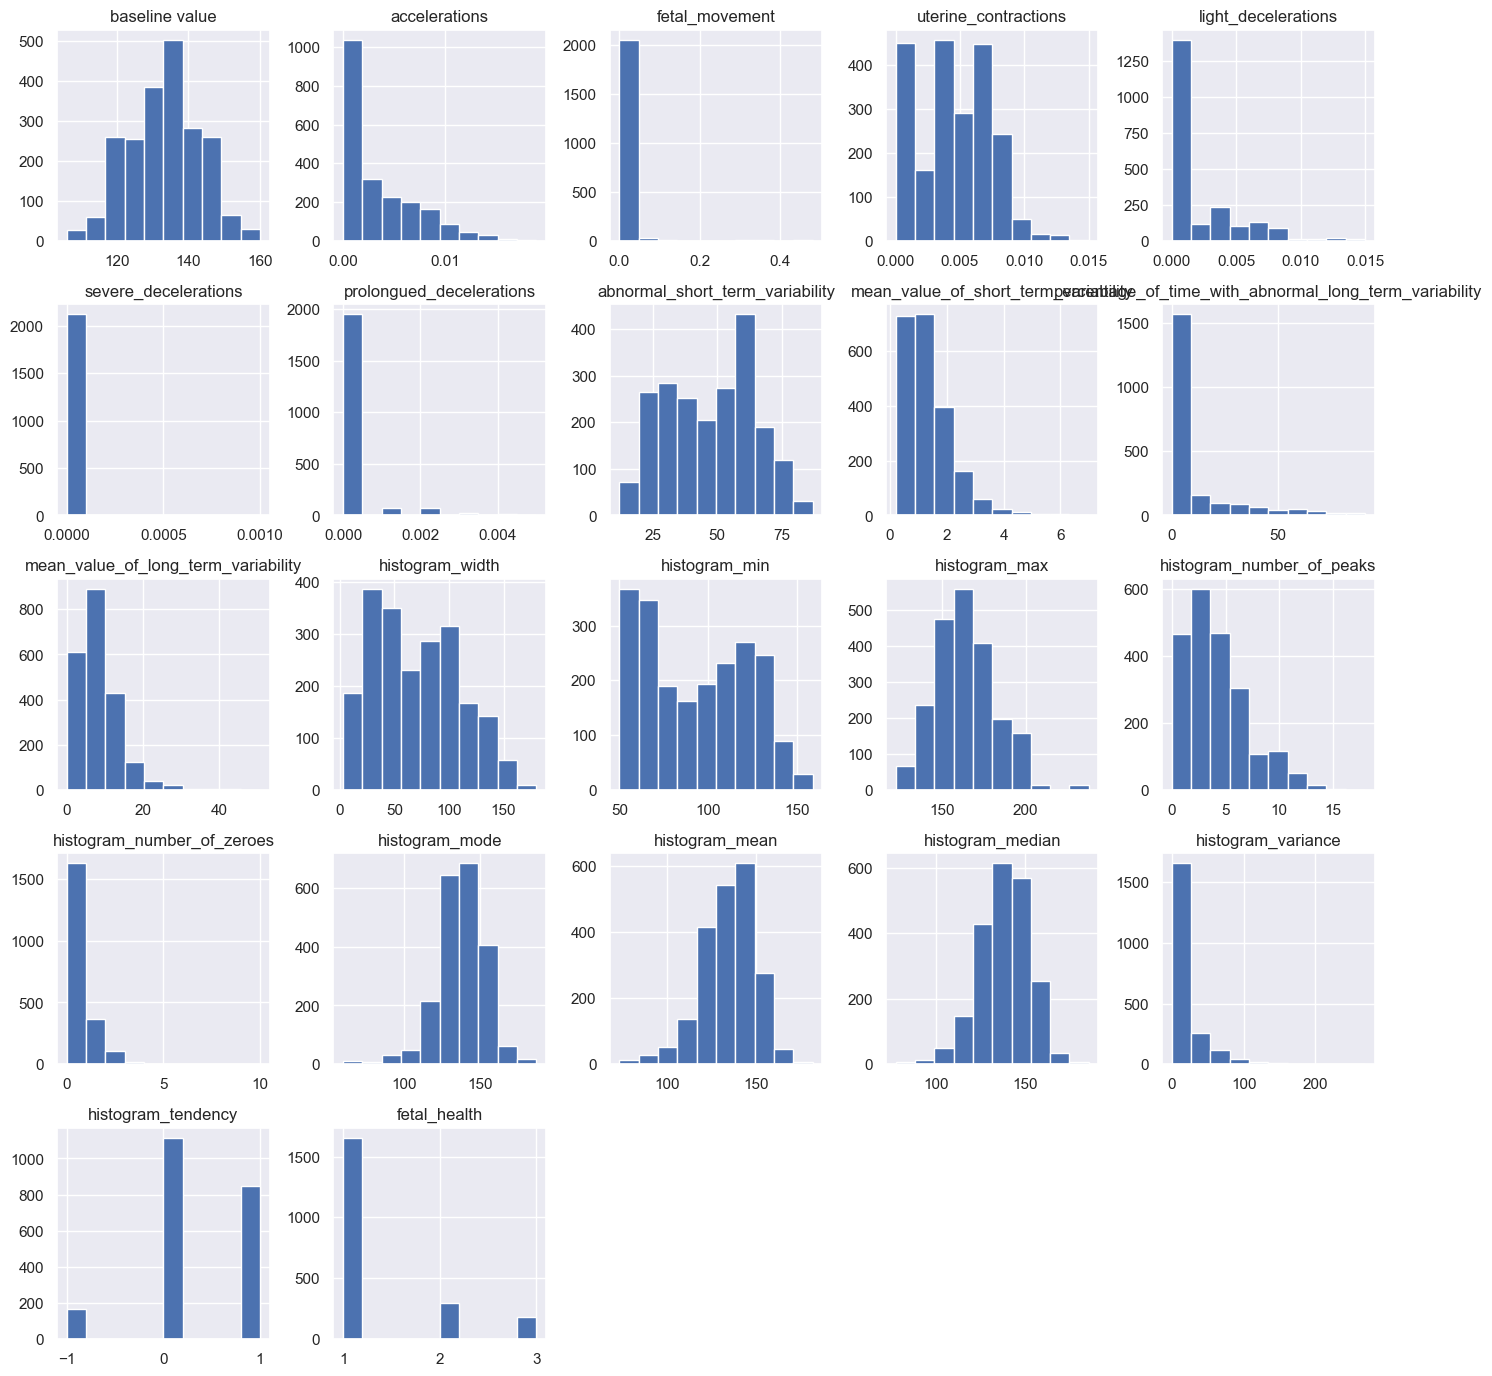

In [65]:
data.hist(figsize=(17,17),layout=(5,5),sharex=False)

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

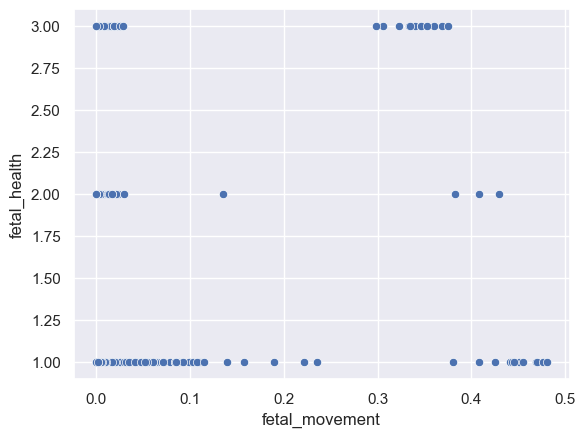

In [66]:
sns.scatterplot(x=data['fetal_movement'], y=data['fetal_health'])


<Axes: >

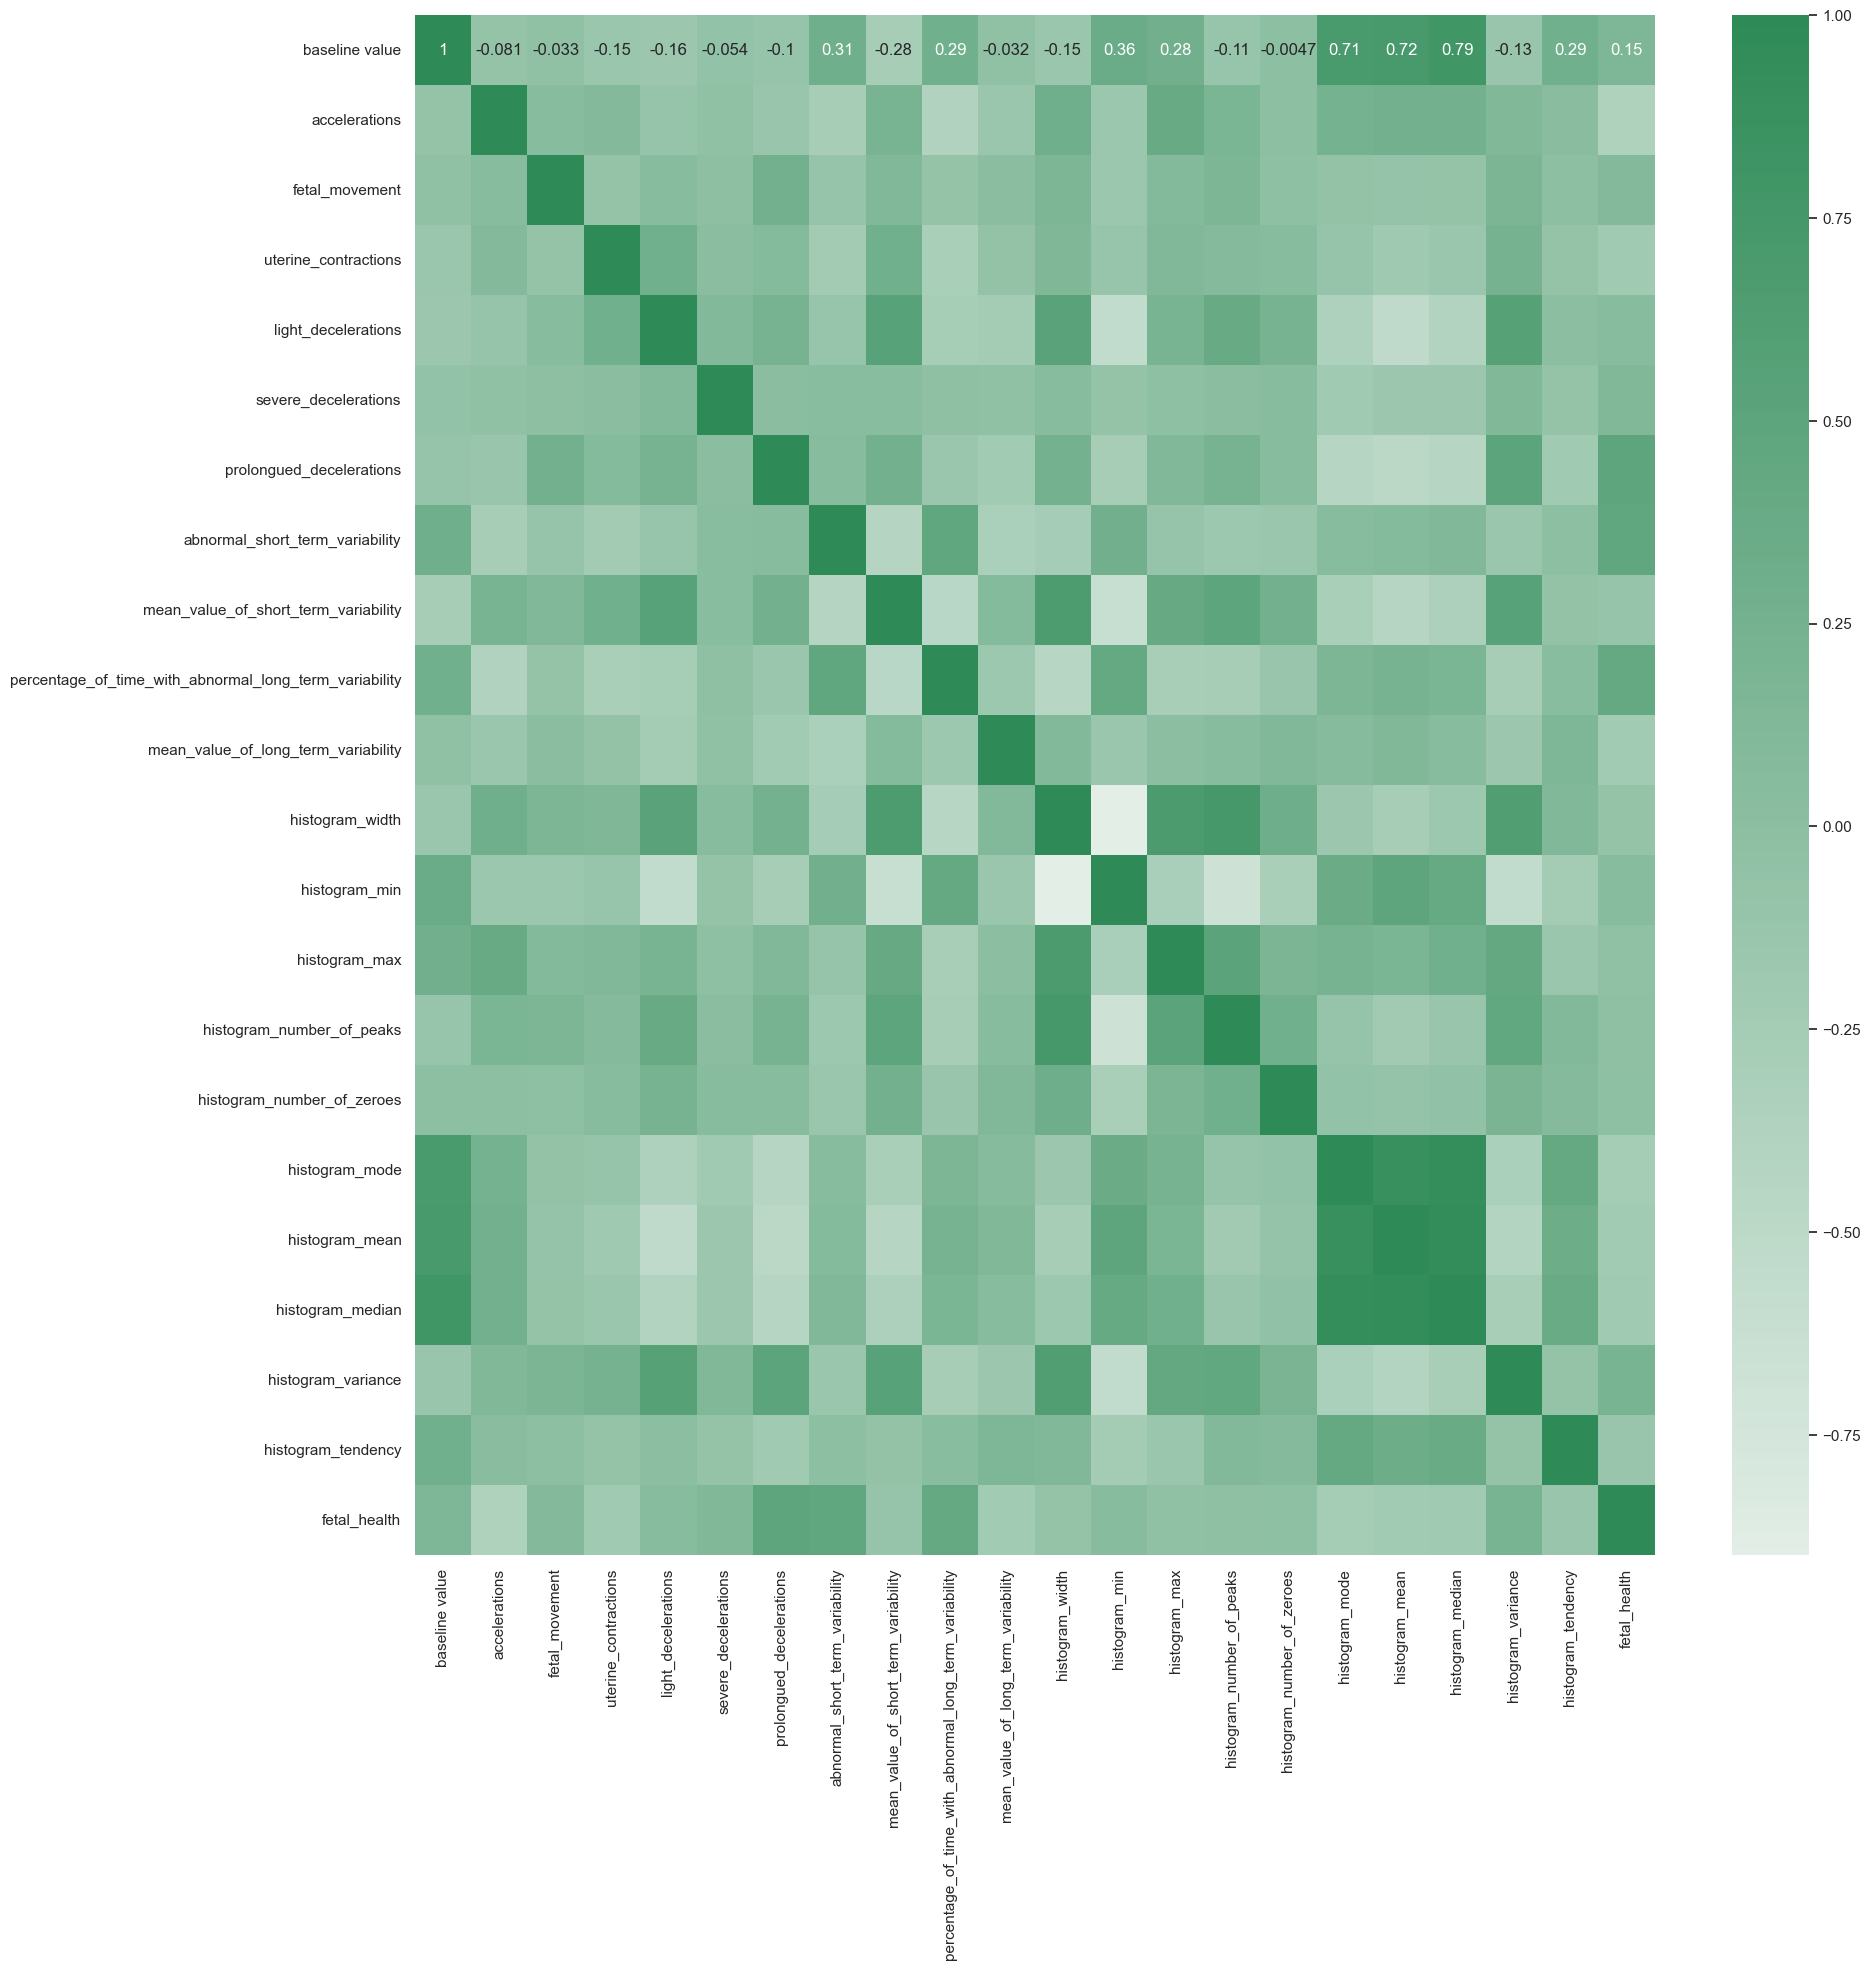

In [67]:
corrmat=data.corr()
plt.figure(figsize=(20,20))
cmap=sns.light_palette("seagreen",as_cmap=True)
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

In [68]:
data.drop(columns=['histogram_mean'],axis=1,inplace=True)

In [69]:
data.corr()["fetal_health"].sort_values(ascending=False)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [70]:
new_data = data.loc[:, [
    "prolongued_decelerations",
    "abnormal_short_term_variability",
    "percentage_of_time_with_abnormal_long_term_variability",
    "histogram_variance",
    "histogram_median",
    "mean_value_of_long_term_variability",
    "histogram_mode",
    "accelerations"
]]


In [71]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance,histogram_median,mean_value_of_long_term_variability,histogram_mode,accelerations
0,0.0,73.0,43.0,73.0,121.0,2.4,120.0,0.000
1,0.0,17.0,0.0,12.0,140.0,10.4,141.0,0.006
2,0.0,16.0,0.0,13.0,138.0,13.4,141.0,0.003
3,0.0,16.0,0.0,13.0,137.0,23.0,137.0,0.003
4,0.0,16.0,0.0,11.0,138.0,19.9,137.0,0.007


In [72]:
X = data.drop(columns=['fetal_health'])
y = data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd. DataFrame (scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,0.047337,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,0.205128,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,0.264300,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,0.453649,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,0.392505,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.559633,0.040892,1.0


In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [74]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Check the shapes of the split data
X_train.shape, X_test.shape


((1488, 20), (638, 20))

In [75]:
import imblearn


In [76]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [77]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

In [78]:
from collections import Counter
print("Before SMOTE: ",Counter(y_train))
print("After SMOTE: ",Counter(y_train_smote))


Before SMOTE:  Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE:  Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})


In [79]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train_smote,y_train_smote)
prediction=RF_model.predict(X_test)
print(f'Accuracy Score is {accuracy_score(y_test, prediction)}')


Accuracy Score is 0.9529780564263323


Amount of training data is: 1488
Accuracy of Random Forest classifier is: 0.9529780564263323


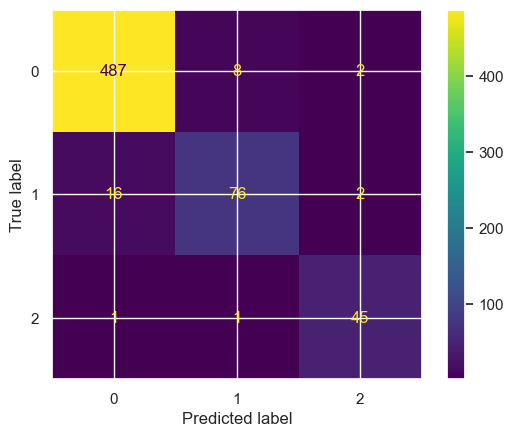

In [80]:






size = X_train.shape[0]  # or len(X_train)

print("Amount of training data is:", size)
print("Accuracy of Random Forest classifier is:", RF_model.score(X_test, y_test))

cm = confusion_matrix(y_test, prediction)
cm_display = ConfusionMatrixDisplay(cm).plot()

plt.show()


In [81]:
print("Total samples:", len(X))  # or len(data) if X is derived from data


Total samples: 2126


In [82]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train_smote,y_train_smote)
prediction=DT_model.predict(X_test)
print(
    f'Accuracy score of the Decision Tree model is {accuracy_score(y_test, prediction)}'
)


Accuracy score of the Decision Tree model is 0.9169278996865203


For the amount of training data is: 1488
Accuracy of Desision Tree Classifier is: 0.9169278996865203


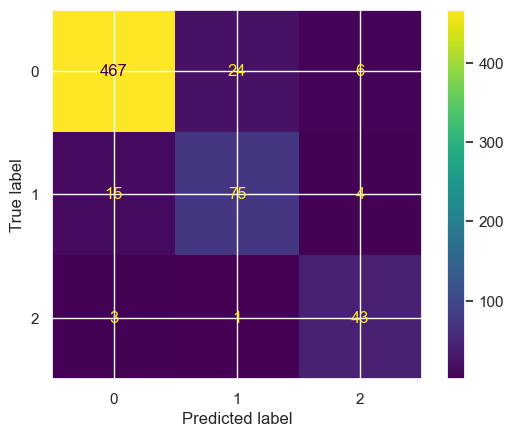

In [83]:
print("For the amount of training data is:",size)
print("Accuracy of Desision Tree Classifier is:",DT_model.score(X_test,y_test))
cm=confusion_matrix(y_test,prediction)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()


In [84]:
LR_model=LogisticRegression()
LR_model.fit(X_train_smote,y_train_smote)
prediction=LR_model.predict(X_test)
print(
    f'Accuracy score of the Logistic Regression model is {accuracy_score(y_test, prediction)}'
)

Accuracy score of the Logistic Regression model is 0.786833855799373


For the amounts of training data is:  1488
Accuracy of Logistic Regression is:  0.786833855799373


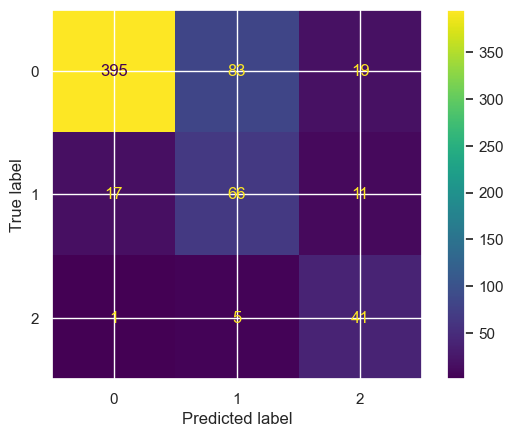

In [85]:
print("For the amounts of training data is: ",size)
print("Accuracy of Logistic Regression is: ",LR_model.score(X_test,y_test))
cm=confusion_matrix(y_test,prediction)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()






In [86]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_smote,y_train_smote)
prediction=KNN_model.predict(X_test)
print('Accuracy=',accuracy_score(y_test,prediction))

Accuracy= 0.877742946708464


For the amounts of training data is:  1488
Accuracy of KNeighboursclassifier is:  0.877742946708464


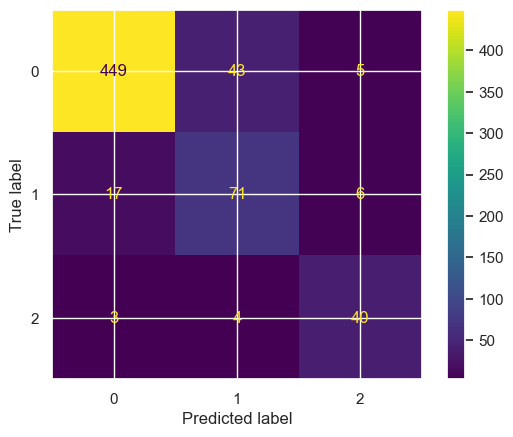

In [87]:
print("For the amounts of training data is: ",size)
print("Accuracy of KNeighboursclassifier is: ",KNN_model.score(X_test,y_test))
cm=confusion_matrix(y_test,prediction)
cm_display=ConfusionMatrixDisplay(cm).plot()
plt.show()

In [88]:
print(X_train.shape)  # should be (num_samples, 20)


(1488, 20)


In [89]:
test_input = [[0.345, 0.1225, 23346, 0.987, 2345, 123, 0, 
               1, 0.5, 10, 0, 2.3, 0, 5, 1.2, 3.4, 7.8, 0, 1, 6]]
RF_model.predict(test_input)


array([1.])

In [90]:
# Sample input with 20 features (replace with actual values as per your dataset)
test_input2 = [[0.000, 0.0, 73.0, 43.0, 2.4, 73.0, 120.0, 121.0,
                0.5, 1.0, 33.0, 0.1, 2.0, 4.5, 0.0, 1.0, 77.0, 22.0, 3.3, 0.0]]

# Prediction
prediction = RF_model.predict(test_input2)
print("Prediction:", prediction)


Prediction: [3.]


In [91]:
test_input3 = [[0.005, 0.002, 135.0, 145.0, 1.6, 95.0, 130.0, 135.0,
                        0.5, 0.005, 38.0, 0.1, 1.0, 4.0, 0.1, 0.0, 120.0, 122.0, 124.0, 1.2]]
# Prediction
prediction = RF_model.predict(test_input3)
print("Prediction:", prediction)



Prediction: [3.]


In [92]:
print(RF_model.classes_)


[1. 2. 3.]


In [93]:
label_map = {
    1: "Low Risk",
    2: "Medium Risk",
    3: "High Risk"
}
print("Predicted Class:", label_map[int(prediction[0])])


Predicted Class: High Risk


In [94]:
names = ['Random Forest Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'K Neighbors Classifier']
scores = [
    accuracy_score(y_test, RF_model.predict(X_test)),
    accuracy_score(y_test, LR_model.predict(X_test)),
    accuracy_score(y_test, DT_model.predict(X_test)),
    accuracy_score(y_test, KNN_model.predict(X_test))
]

df = pd.DataFrame({'name': names, 'score': scores})
print(df)


                       name     score
0  Random Forest Classifier  0.952978
1       Logistic Regression  0.786834
2  Decision Tree Classifier  0.916928
3    K Neighbors Classifier  0.877743


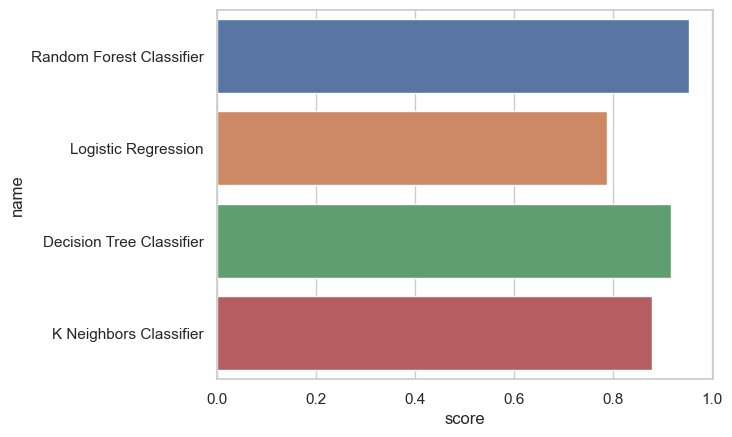

In [95]:
sns.set_theme(style="whitegrid")
ax=sns.barplot(y="name",x="score",data=df)

In [96]:
import pickle

# Save the model to the 'flask' subfolder inside 'fetal_health folder'
pickle.dump(RF_model, open('fetal_health folder/flask/fetal_health.pkl', 'wb'))


In [97]:
import numpy as np
print(np.__version__)


1.26.4


In [98]:
import sklearn
print(sklearn.__version__)


1.2.2


In [99]:
names = ['Random Forest Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'K Neighbors Classifier']
scores = [
    accuracy_score(y_test, RF_model.predict(X_test)),
    accuracy_score(y_test, LR_model.predict(X_test)),
    accuracy_score(y_test, DT_model.predict(X_test)),
    accuracy_score(y_test, KNN_model.predict(X_test))
]

df = pd.DataFrame({'name': names, 'score': scores})
print(df)


                       name     score
0  Random Forest Classifier  0.952978
1       Logistic Regression  0.786834
2  Decision Tree Classifier  0.916928
3    K Neighbors Classifier  0.877743
